In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
t_d = pd.read_csv('IMDB Dataset.csv')
t_d.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [3]:
t_d.isna().sum()

review       0
sentiment    0
dtype: int64

In [4]:
st = set(stopwords.words('english'))
p_ck = list(punctuation)
st.update(p_ck)

In [6]:
def 웹문서_처리(t):
    su = BeautifulSoup(t,'html.parser')
    return su.get_text()
def 정규표현_정리(t):
    return re.sub('\[[^]*\]','',t)
def 불필요_정리(t):
    return re.sub('http\S+','',t)
def 불용어_처리(t):
    f_l = []
    for i in t.split():
        if i.strip().lower() not in st and i.strip().lower().isalpha():
            f_l.append(i.strip().lower())
    return ' '.join(f_l)
def 모두_정리(t):
    t = 웹문서_처리(t)
    t = 불필요_정리(t)
    t = 불용어_처리(t)
    return t
t_d['review'] = t_d['review'].apply(모두_정리)

In [7]:
t_d.sentiment.replace('positive',1,inplace=True)
t_d.sentiment.replace('negative',0,inplace=True)

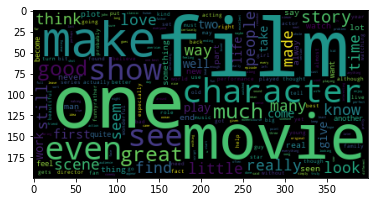

In [8]:
wc = WordCloud(max_words=2000).generate(' '.join(t_d[t_d.sentiment==1].review))
plt.imshow(wc)

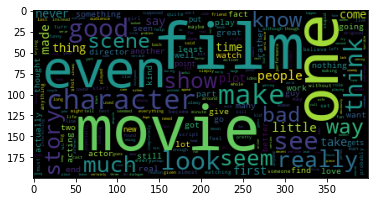

In [9]:
wc = WordCloud(max_words=2000).generate(' '.join(t_d[t_d.sentiment==0].review))
plt.imshow(wc)

길이는 조건이 x

In [12]:
t_l_0 = t_d[t_d.sentiment==0]['review'].str.len()
t_l_1 = t_d[t_d.sentiment==1]['review'].str.len()

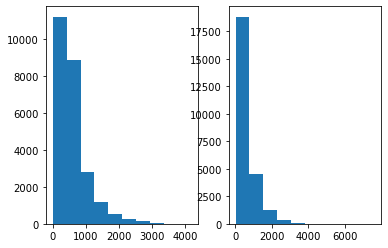

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(t_l_0)
ax2.hist(t_l_1)
plt.show()

문장별 단어의 수는 조건 x

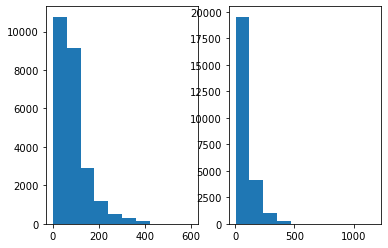

In [19]:
t_l_0 = t_d[t_d.sentiment==0]['review'].str.split().map(lambda x: len(x))
t_l_1 = t_d[t_d.sentiment==1]['review'].str.split().map(lambda x: len(x))
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(t_l_0)
ax2.hist(t_l_1)
plt.show()

평균 단어 길이 조건 x

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


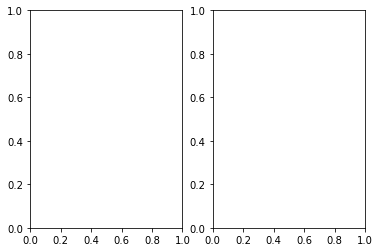

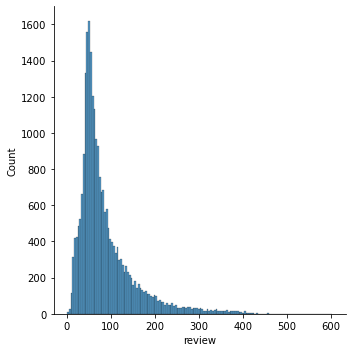

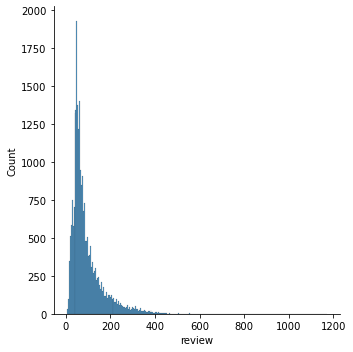

In [26]:
fig,(ax1,ax2) = plt.subplots(1,2)
t_l_0 = t_d[t_d.sentiment==0]['review'].str.split().apply(lambda x: [len(x) for i in x])
sns.displot(t_l_0.map(lambda x : np.mean(x)),ax = ax1)
t_l_1 = t_d[t_d.sentiment==1]['review'].str.split().apply(lambda x: [len(x) for i in x])
sns.displot(t_l_1.map(lambda x : np.mean(x)),ax = ax2)

In [29]:
def N_그램_표현(t,n,g):
    tv = CountVectorizer(ngram_range=(g,g)).fit(t)
    Bow = tv.transform(t)
    sum_Bow = Bow.sum(axis = 0)
    w_f = [(w,sum_Bow[0,i]) for w,i in tv.vocabulary_.items()]
    w_f = sorted(w_f, key = lambda x : x[1], reverse= True)
    return w_f[:n]
N_그램_표현(t_d.review,20,1)

[('movie', 61496),
 ('film', 55088),
 ('one', 45067),
 ('like', 37303),
 ('would', 23815),
 ('even', 23720),
 ('good', 23475),
 ('really', 21806),
 ('see', 20906),
 ('get', 17692),
 ('much', 17294),
 ('story', 16812),
 ('also', 15775),
 ('time', 15660),
 ('first', 15475),
 ('great', 15475),
 ('people', 15036),
 ('make', 15030),
 ('could', 14929),
 ('made', 13562)]